<a href="https://colab.research.google.com/github/abulzunayed/Machine-Learning_Course_Udemy-A-Z-with-Python_2023-/blob/main/Regression_code/Support_vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support vector regression

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML AtoZ/Position_Salaries _SVR.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
x= df.iloc[:, 1:-1].values # Here we take only Level column and ignore Position column
y= df.iloc[:, -1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
y= y.reshape(len(y),1)  # we need to reshape y because x values are vertically and y was Horizontally. Here, len(y) means no.of rows.

In [ ]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Features Scaling:

If one feature value (x col) is far different than another feature value (y col), Then we use feature scaling. If the feature col output contains zero or one bineary number then we do not use feature.
StandardScale convert to matrix with standeard deviation within a certain range[-value, +value]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()

x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y)

In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Training the SVR model on the whole dataset:

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')   # rbf means Gassian Radial Basis Function Kernel, which most usage in SVR kernel
regressor.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result 

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform( [ [6.5] ])).reshape(-1,1))

# Here, in addition to prediction method, we need to inverse_transform method because our previous rescaling output was minus values "-"

array([[170370.0204065]])

Visualizing the SVR result:

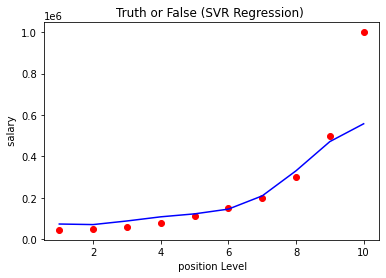

In [ ]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')  # We need to invers x & y values because proper scaling graph
plt.plot( sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.title('Truth or False (SVR Regression) ')
plt.xlabel(' position Level')
plt.ylabel(' salary')
plt.show()


Visualising the SVR result  for High resolution and smoother curve: 

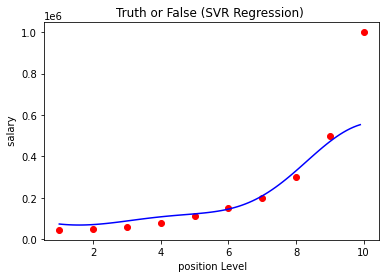

In [ ]:
x_grid= np.arange( min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid= x_grid.reshape( len(x_grid), 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')  # We need to invers x & y values because proper scaling graph
plt.plot( x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid) ).reshape(-1,1)), color='blue')
plt.title('Truth or False (SVR Regression) ')
plt.xlabel(' position Level')
plt.xlabel(' position Level')
plt.ylabel(' salary')
plt.show()

# Evaluating the Model Performance

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.57 -0.67]
 [ 0.66  0.88]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9513839452187653

# Quiz question:

1. In SVR episilon insensative Tube , the tube is used in a sense as a margin of error?
Ans: Yes

2. If a point falls in the tube we disregard errors that fall withinit?
Ans: Yes

3. If a point falls outside the epsilon insensative tube, do we care about the distance?
Ans: Yes

4. Why it called SVR?
Ans:  its because each point is seen as a vector. Every point outside the tube is a support vector, ductating the formation of the tube.